In [1]:
##Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [2]:
##Import Training Dataset
loans_train_df = pd.read_csv('./outputs/cleaned_loans_train.csv')
loans_train_df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,HOME_OWNERSHIP_MORTGAGE,HOME_OWNERSHIP_OTHER,HOME_OWNERSHIP_OWN,...,LOAN_GRADE_C,LOAN_GRADE_D,LOAN_GRADE_E,LOAN_GRADE_F,LOAN_GRADE_G,CB_PERSON_CRED_HIST_LENGTH_11_17,CB_PERSON_CRED_HIST_LENGTH_18_above,CB_PERSON_CRED_HIST_LENGTH_5_10,CB_PERSON_CRED_HIST_LENGTH_5_below,loan_status
0,1.569810,-1.081300,-1.896802,-0.376831,0.516442,0.117377,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,-0.921749,-0.052533,0.601256,-1.008211,0.619568,-0.973233,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
2,0.240979,-1.508067,0.923880,-0.376831,0.340882,0.553621,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.407083,0.435895,1.579652,0.702519,0.493327,0.117377,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.921749,0.098482,-0.486461,-0.376831,0.167927,-0.646050,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85347,-0.825840,-0.691982,0.517694,-0.144317,0.769886,0.037522,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
85348,-0.648155,-0.427946,0.870524,-0.018163,0.714130,-0.030169,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
85349,-0.755645,-0.620268,0.668372,-0.215623,0.754603,-0.100745,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
85350,-0.893148,-0.798974,0.273201,-0.108250,0.794685,0.170102,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1


In [3]:
##Import Training Dataset
loans_validation_df = pd.read_csv('./outputs/cleaned_loans_validation.csv')
loans_validation_df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,HOME_OWNERSHIP_MORTGAGE,HOME_OWNERSHIP_OTHER,HOME_OWNERSHIP_OWN,...,LOAN_GRADE_C,LOAN_GRADE_D,LOAN_GRADE_E,LOAN_GRADE_F,LOAN_GRADE_G,CB_PERSON_CRED_HIST_LENGTH_11_17,CB_PERSON_CRED_HIST_LENGTH_18_above,CB_PERSON_CRED_HIST_LENGTH_5_10,CB_PERSON_CRED_HIST_LENGTH_5_below,loan_status
0,-0.423437,0.537564,-1.122994,0.095053,0.727960,-0.508550,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
1,-0.257333,-0.214744,0.601256,0.636247,0.630802,0.662682,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,-0.091229,-1.418713,-1.006976,0.856821,0.485862,3.062024,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,5.026957,-0.970461,-0.486461,-0.021168,0.561812,0.533243,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,-0.755645,0.032650,0.657895,1.416675,0.773616,1.680266,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15076,2.234226,-1.403381,0.403366,-0.059171,0.507755,0.958865,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
15077,-0.572992,-1.307917,0.569624,-0.376831,0.824106,0.335499,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
15078,-0.837751,-1.298289,-0.162310,-2.230734,0.376167,-1.137446,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
15079,-0.257333,-1.492919,1.181491,0.418613,0.808751,1.971414,1,0,0,0,...,0,1,0,0,0,0,0,0,1,1


In [4]:
X = loans_train_df.loc[:, loans_train_df.columns != "loan_status"]
y = loans_train_df["loan_status"]

In [5]:
svc = make_pipeline(SVC(kernel="rbf", verbose=True))
svc.fit(X, y)

[LibSVM]

Pipeline(steps=[('svc', SVC(verbose=True))])

In [6]:
y_true = loans_validation_df["loan_status"]
y_pred = svc.predict(loans_validation_df.loc[:, loans_validation_df.columns != "loan_status"])

In [7]:
print(y_pred)

[1 1 1 ... 1 1 0]


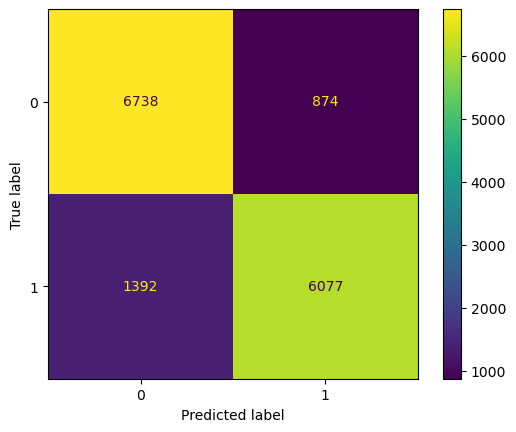

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svc.classes_)
disp.plot()
plt.show()

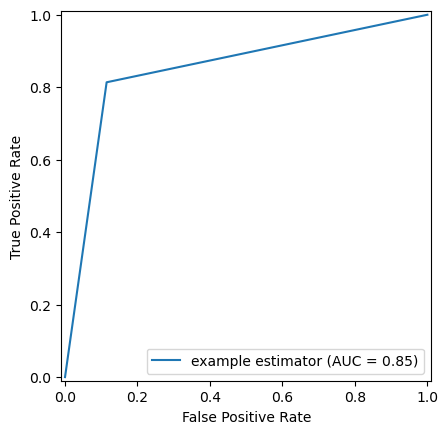

In [9]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')

display.plot()
plt.show()